# KNN Classifier for Injection Molding of Bins using tsfresh data

In [1]:
import pandas as pd
import numpy as np
import my_preprocessing_functions as mpf
from sklearn.metrics import confusion_matrix, recall_score, f1_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sn
from pprint import pp
import os

In [2]:
filename = 'processed_data_pv_0.1.csv'
data_path = os.getcwd() + "/BalanceData/"
dataset_df = pd.read_csv(data_path + filename)

In [3]:
print('For the full dataset,')
mpf.check_imbalance(dataset_df['valid_or_not'])

For the full dataset,
The imbalance profile has:
 50.00% of valid products and     
 50.00% of invalid products


In [4]:
# Random Forest classificator evaluator function
def knn_train_evaluator(knn_model, Xtrain, ytrain, Xtest, ytest) -> tuple:
    model_knn = knn_model
    model_knn.fit(Xtrain, ytrain)
    mean_accuracy = model_knn.score(Xtest, ytest) * 100
    y_predicted = model_knn.predict(Xtest)
    return (mean_accuracy, y_predicted)

In [5]:
X = dataset_df.drop('valid_or_not', axis='columns')
y = dataset_df['valid_or_not']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [7]:
mpf.check_imbalance(y_train)
mpf.check_imbalance(y_test)

The imbalance profile has:
 49.02% of valid products and     
 50.98% of invalid products
The imbalance profile has:
 53.94% of valid products and     
 46.06% of invalid products


In [8]:
pilot_model_knn = KNeighborsClassifier(n_neighbors=29)

In [9]:
r_pilot_accuracy, r_pilot_predictions = knn_train_evaluator(pilot_model_knn, X_train, y_train, X_test, y_test)
rcm = confusion_matrix(y_test, r_pilot_predictions)

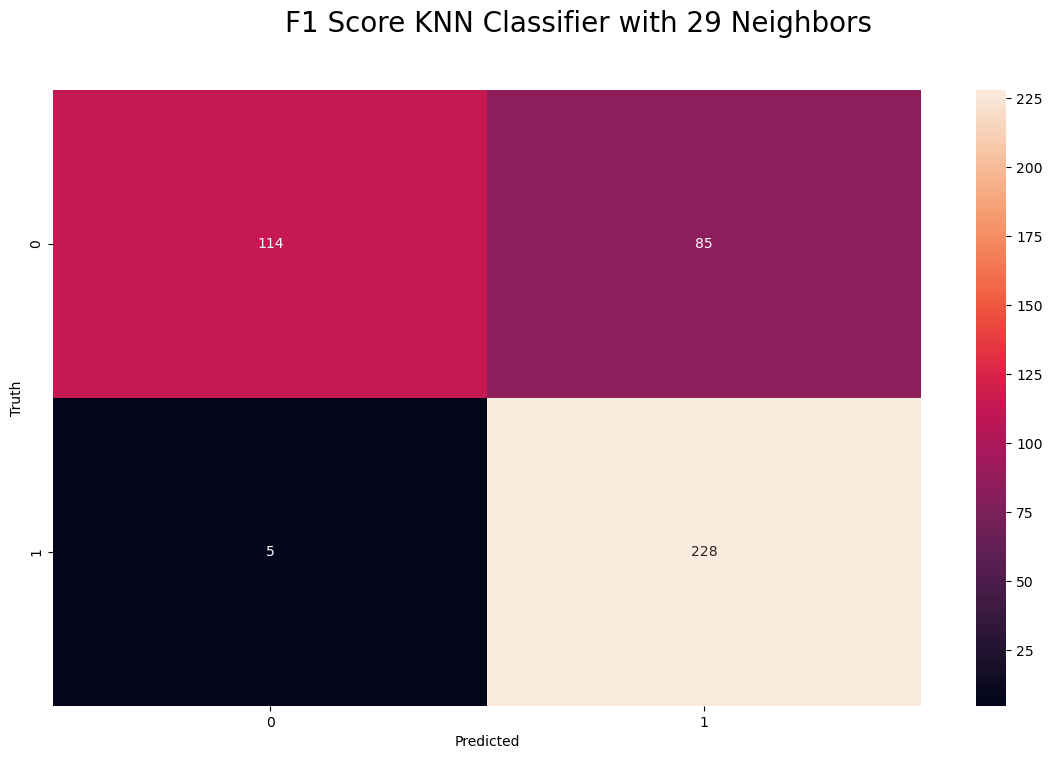

In [10]:
fig_rfc = plt.figure(figsize=[14, 8])
fs = 20  # fontsize
lw = 5  # linewidth
fig_rfc.suptitle("F1 Score KNN Classifier with 29 Neighbors", fontsize=fs)
sn.heatmap(rcm, annot=True, fmt="")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [11]:
f1_rscores = f1_score(y_test, r_pilot_predictions, average=None)
print(f"The f1 scores for the not valid and valid classes are respectively {f1_rscores[0]:.2f} and {f1_rscores[1]:.2f}")

The f1 scores for the not valid and valid classes are respectively 0.72 and 0.84


## Grid Search and Cross-Validation (5-fold)
- Done previously on the single case KNN notebook.
- cv = 5 implemented!